## `Task` Do feature selection as per metods taught is session 54 on SECOM dataset.

Dataset Link : https://archive.ics.uci.edu/ml/datasets/SECOM

Drive Link : https://docs.google.com/spreadsheets/d/1dFCe1zgokabsiEr6BbWmMJtiMefkrChpJWLiG_0dDkk/edit?usp=share_link

In [55]:

import pandas as pd
import numpy as np
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv"

df=pd.read_csv(url,index_col=0)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
Time,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [56]:
print(df.columns[-1])

Pass/Fail


In [57]:
# checking the accuracy with all the given features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]

# print("X.shape =",X.shape)
# print("y.shape =",y.shape)

# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train =",X_train.shape)
print("X_test =",X_test.shape)
# print("y_train =",y_train.shape)
# print("y_test =",y_test.shape)

# applying imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
# applyint Logistic regression on X_train

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

# predicting y_pred
y_pred = log_reg.predict(X_test)

# test accuracy score
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)



X_train = (1253, 590)
X_test = (314, 590)
Accuracy: 0.9076433121019108


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# check for duplicate features
X_train = pd.DataFrame(X_train)
X_train = X_train.T.drop_duplicates().T
columns = X_train.columns
columns = list(columns)
# print(columns)
X_test = pd.DataFrame(X_test).loc[:,columns]
print(X_test.shape)

# X_test = pd.DataFrame(X_test)
# X_test = X_test.T.drop_duplicates().T
print(X_train.shape)
#(1253, 478)
# print(X_test.shape)
#(314,472)

(314, 478)
(1253, 478)


# compute variance threshold

In [63]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
sel.fit(X_train)



VarianceThreshold(threshold=0.1)

In [65]:
sum(sel.get_support())

272

In [67]:
columns=X_train.columns[sel.get_support()]

X_train = pd.DataFrame(sel.transform(X_train), columns=columns)
X_test = pd.DataFrame(sel.transform(X_test), columns=columns)
print(X_train.shape)
print(X_test.shape)

(1253, 272)
(314, 272)


In [68]:
# compute correlation

(1253, 168)
(314, 168)


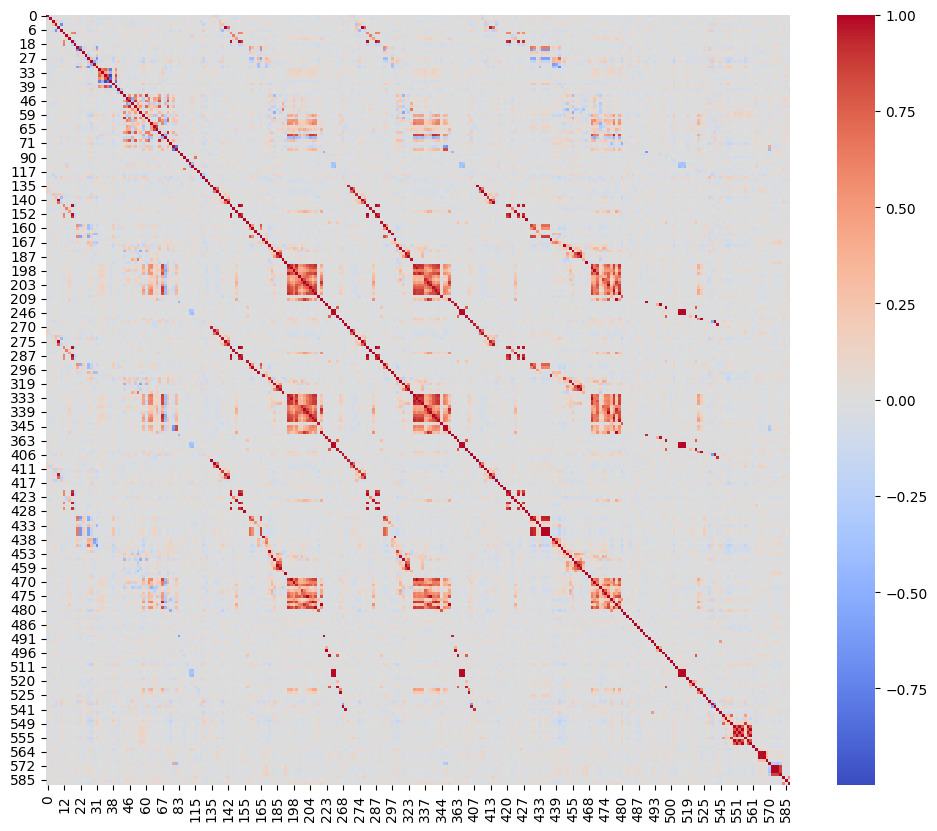

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), cmap='coolwarm')

corr_matrix = X_train.corr()
corr_matrix
threshold = 0.9
target_corr = X_train.corrwith(pd.Series(y_train)).abs()
columns_to_remove = set()

for i in range(corr_matrix.shape[1]):
  for j in range(i+1,corr_matrix.shape[1]):
    if abs(corr_matrix.iloc[i,j]) > threshold:
      if target_corr[corr_matrix.columns[i]] < target_corr[corr_matrix.columns[j]]:
        columns_to_remove.add(X_train.columns[i])
      else:
        columns_to_remove.add(X_train.columns[j])

columns = list(columns_to_remove)

X_train = X_train.drop(columns=columns)
X_test = X_test.drop(columns=columns)
print(X_train.shape)
print(X_test.shape)

<Axes: >

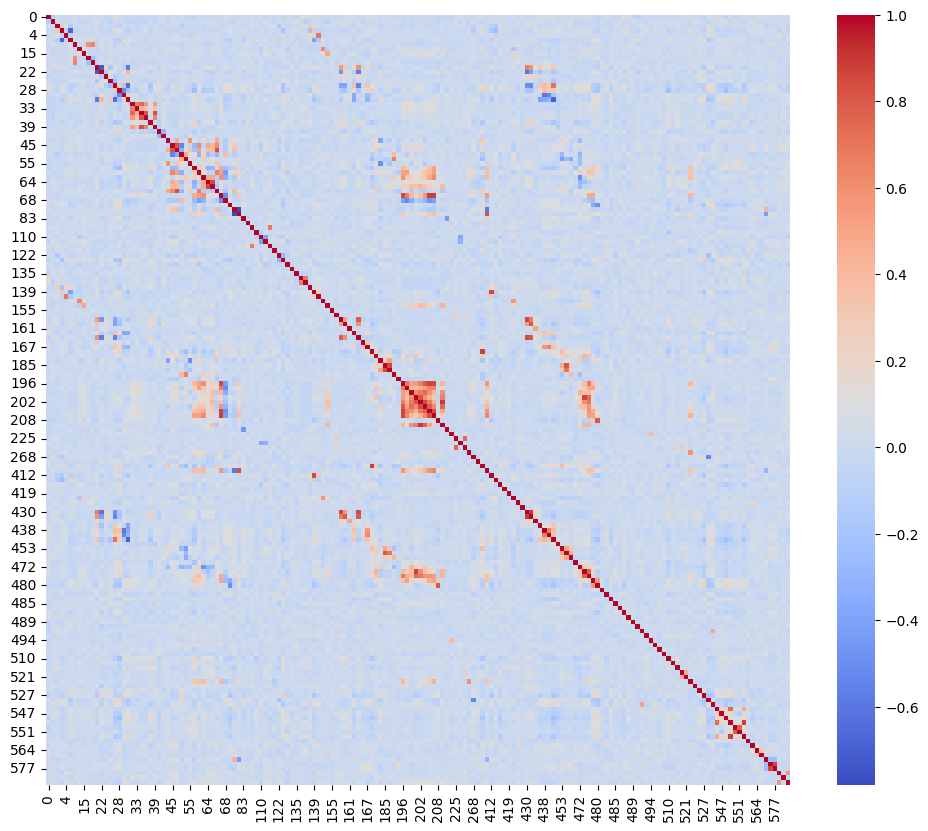

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), cmap='coolwarm')

# Calculating ANOVA

In [82]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel= SelectKBest(f_classif,k=100).fit(X_train,y_train)
columns=X_train.columns[sel.get_support()]
columns = list(columns)

X_train = pd.DataFrame(sel.transform(X_train),columns=columns)
X_test = pd.DataFrame(sel.transform(X_test),columns=columns)

print(X_train.shape)
print(X_test.shape)




(1253, 100)
(314, 100)


Applying LogesticRegression and comparing

In [84]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)
# Accuracy score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9203821656050956


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
